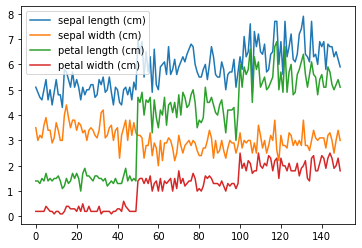

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import VarianceThreshold

iris = load_iris()
X = iris.data
y = iris.target

plt.plot(X)
plt.legend(iris.feature_names)

In [4]:
X.var(axis=0)

array([0.68112222, 0.18871289, 3.09550267, 0.57713289])

[ True False  True  True]


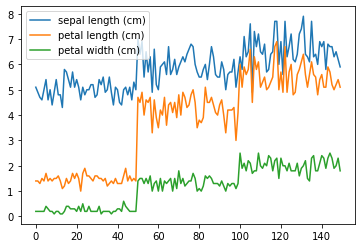

In [17]:
selector = VarianceThreshold(threshold=0.2)
X_s = selector.fit_transform(X)
print(selector.get_support())
names = np.array(iris.feature_names)[selector.get_support()]
plt.plot(X_s)
plt.legend(names)

In [19]:
from sklearn.feature_selection import SelectKBest, chi2
chi2(X, y)

(array([ 10.81782088,   3.7107283 , 116.31261309,  67.0483602 ]),
 array([4.47651499e-03, 1.56395980e-01, 5.53397228e-26, 2.75824965e-15]))

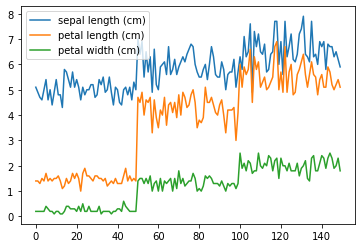

In [24]:
selector = SelectKBest(chi2, k=3)
X_s2 = selector.fit_transform(X, y)
plt.plot(X_s2)
plt.legend(np.array(iris.feature_names)[selector.get_support()])

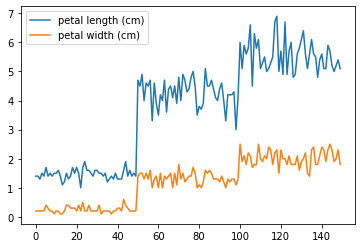

In [29]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import SGDClassifier
selector = SelectFromModel(SGDClassifier(random_state=0), threshold='mean')
X_s3 = selector.fit_transform(X, y)
plt.plot(X_s3)
plt.legend(np.array(iris.feature_names)[selector.get_support()])

In [52]:
from sklearn.feature_selection import RFE, RFECV
selector = RFECV(SGDClassifier(random_state=0), step=1, min_features_to_select=3, cv=5)
selector.fit(X, y)
selector.ranking_

array([2, 1, 1, 1])

In [53]:
selector.grid_scores_

array([0.84666667, 0.77333333])

In [54]:
selector.get_support()

array([False,  True,  True,  True])